# Predicting car prices

In this project we'll use the k-neighbors algorythm to predict a car price based on market data.

## Introduction to the data set

In [12]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_df = pd.read_csv("imports-85.data", names=cols)
cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We will only focus on continuous value.

In [2]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars_df[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data cleaning

In [3]:
numeric_cars = numeric_cars.replace("?", np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [5]:
# As price is the value we want to predict, we need to remove NaN values
clean = numeric_cars.copy()
clean = clean.dropna(subset=["price"])
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               197 non-null    float64
 8   stroke             197 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         199 non-null    float64
 11  peak-rpm           199 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [6]:
# Fill other column with the corresponding mean value
clean = clean.fillna(clean.mean())
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [7]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
clean = (clean - clean.min())/(clean.max() - clean.min())
clean['price'] = price_col
numeric_cars = clean

In [8]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Prediction time

Univariate k-neighbor models :

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def knn_train_test(df, features, target, n_neighbors):
    # randomise the order of the rows in our dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    i_split = int(len(numeric_cars)/2) 
    train = rand_df.iloc[:i_split]
    test = rand_df.iloc[i_split:]
    rmses=[]
    for k in n_neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[features], train[target])
        predictions = knn.predict(test[features])
        rmses.append(int(mean_squared_error(predictions, test[target])**0.5))
    return rmses

univariate_rmses={}
for col in numeric_cars.columns.drop('price'):
    rmses = knn_train_test(numeric_cars, [col], "price", [1,3,5,7,9])
    univariate_rmses[col] = (np.mean(rmses), rmses)
    
rmse_result = pd.Series(univariate_rmses)
rmse_result.sort_values()

engine-size          (3346.0, [3258, 2840, 3238, 3563, 3831])
horsepower           (4219.0, [4170, 4020, 4037, 4353, 4515])
width                (4618.4, [4559, 4606, 4704, 4571, 4652])
curb-weight          (4729.8, [5264, 5022, 4401, 4330, 4632])
highway-mpg          (5069.2, [6025, 4617, 4630, 4796, 5278])
length               (5176.0, [4628, 5129, 5427, 5313, 5383])
city-mpg             (5202.0, [5901, 4646, 4766, 5232, 5465])
wheel-base           (5252.0, [4493, 5120, 5461, 5448, 5738])
compression-rate     (7165.6, [8087, 7375, 6610, 6732, 7024])
bore                 (7222.0, [8602, 6984, 6780, 6878, 6866])
normalized-losses    (7624.0, [7846, 7500, 7330, 7756, 7688])
stroke               (7999.6, [9116, 7338, 8006, 7803, 7735])
peak-rpm             (8119.0, [9511, 8537, 7697, 7510, 7340])
height               (8163.0, [8904, 8277, 8144, 7679, 7811])
dtype: object

From the univariate approach, we can conclude that models using `engine-size`, `horsepower`, `width`, `curb-weight` have the lowest error metric. Thus the best chance to give use an accurate multivariate model.

## Multivariate model

In [10]:
multi_rmses={}
features = ["engine-size","horsepower","width","curb-weight", "highway-mpg","length"]

for i in range(2, len(features)+1):
    #print(features[:i])
    multi_rmses[i] = knn_train_test(numeric_cars, features[:i], "price", range(1,25))
    
print(multi_rmses)
print(len(multi_rmses))

{2: [2783, 2657, 2792, 2891, 2949, 3096, 3164, 3413, 3748, 4080, 4215, 4275, 4373, 4424, 4539, 4667, 4729, 4790, 4824, 4840, 4837, 4831, 4861, 4903], 3: [3399, 3497, 3333, 3355, 3580, 3732, 3639, 3747, 3986, 4005, 4121, 4255, 4328, 4332, 4388, 4408, 4404, 4447, 4537, 4592, 4636, 4721, 4787, 4802], 4: [2952, 3131, 3129, 3241, 3487, 3637, 3606, 3809, 3875, 3997, 4162, 4289, 4368, 4416, 4434, 4441, 4512, 4523, 4534, 4620, 4688, 4731, 4763, 4751], 5: [2824, 2915, 3012, 3202, 3410, 3618, 3622, 3848, 3977, 3994, 4159, 4294, 4380, 4466, 4522, 4536, 4587, 4622, 4612, 4632, 4712, 4676, 4691, 4755], 6: [2912, 3166, 2946, 3236, 3478, 3682, 3808, 3957, 4013, 4048, 4156, 4195, 4304, 4379, 4448, 4479, 4570, 4621, 4666, 4731, 4815, 4867, 4933, 4948]}
5


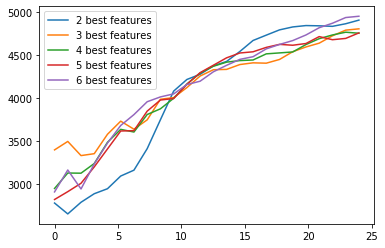

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 24, 24)

for k,v in multi_rmses.items():
    ax.plot(x, v, label="{} best features".format(k));
plt.legend();

From this plot we can see that among these models (multivariate with train/test validation) the best score comes from `n_neighbors=2` with two features : `engine-size` and `horsepower`.
Let's now use the cross validation instead.

## Using cross validation

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def knn_kfold(df, features, target, n_neighbors, n_fold):
    # randomise the order of the rows in our dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    i_split = int(len(numeric_cars)/2) 
    train = rand_df.iloc[:i_split]
    test = rand_df.iloc[i_split:]
    
    kf = KFold(n_fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors = n_neighbors)
    mses = cross_val_score( knn, rand_df[features], rand_df[target], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    return np.mean(rmses)

univariate_rmses={}
for col in numeric_cars.columns.drop('price'):
    rmses = knn_kfold(numeric_cars, [col], "price", 2, 9)
    univariate_rmses[col] = rmses

pd.Series(univariate_rmses).sort_values()

engine-size          3191.885545
horsepower           3325.240852
wheel-base           4189.993332
width                4298.331777
curb-weight          4301.411219
city-mpg             4425.443853
length               4875.764597
highway-mpg          5093.070598
normalized-losses    6041.748545
compression-rate     6227.638023
bore                 6356.693693
stroke               6633.237566
peak-rpm             7229.583394
height               8277.817975
dtype: float64

We now get better results, which is due to the use of cross validation. To get a better model, we would now use the best scoring features with the cross validation.

In this project, we've seen how to properly clean a dataset (removing and replacing value if needed) and used the knn regressor to predict 